# Chapter 5 
# Support Vector Machines

*Support Vector Machine* (SVM) is one of the most popular models in Machine Learning. It is capable of performing linear or nonlinear classification, regression, and even outlier detection. This lecture will explain the core concepts of SVMs, how to use them, and how they work.

## Task 1: Linear SVM with Hard Margin
- Each data example has two features: $x_1$ and $x_2$. Using them as coordinates, they can be visualized as a data point on the coordinate plane.
- Binary classification: target value $y = 1$ means that the instance belongs to a certain class (class 1); $y = -1$ means that the instance belongs to another class (class -1).
- Classes are linearly separable: The two classes can clearly be separrated with a straight line.
- The goal is to find a straight line that best separates the two classes perfectly (no mis-classification is allowed).
- The best straight line that separates the two classes is the one with maximized distance from it to the nearest data point on each class.

<img src="https://github.com/ch00226855/CMP464-788-Spring2019/raw/master/Data/SVM1.png">

In the above graph, there are three lines (H1, H2, H3) that try to separate black dots from white dots.
- H1 is clearly bad because it doesn't even separate the two classes properly.
- H2 separates the two classes perfectly, but it is so close to the data points that it will probably not perform well on new instances.
- H3 not only separates the two classes but also stays as far away from the closest training instances as possible. It is reasonable to believe that H3 will generalize well on new instances.

<img src="https://github.com/ch00226855/CMP464-788-Spring2019/raw/master/Data/SVM2.jpeg">

Notice that adding more training instances "off the street" will not affect the decision boundary at all: it is fully determined (or "supported") by the instances located on the edge of the street. These instances are called the **support vectors**.

SVMs are sensitive to the feature scales, so proper feature scaling is necessary for obtaining a good decision boundary.

## Express an SVM model with three parallel lines

We can use three lines to expression the above binary classifier:

- $w_1x_1 + w_2x_2 + b = 0$ represents the line in the middle of the gap.
- $w_1x_1 + w_2x_2 + b = 1$ represents the right boundary of the gap.
- $w_1x_1 + w_2x_2 + b = -1$ represents the left boundary of the gap.

The parameters of this model are $w_1(\ge 0), w_2, b$. To avoid ambiguity, we choose $w_1$ to be non-negative. Here all three lines share the same slope w because they are parallel. 

- For any point $(x_1, x_2)$ on the right half plane divided by the central line, the expression $w_1x_1 + w_2x_2 + b$ is positive.
- For any point $(x_1, x_2)$ on the left half plane, $w_1x_1 + w_2x_2 + b$ is negative.

**Question**: How to compute the slope of these lines?


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

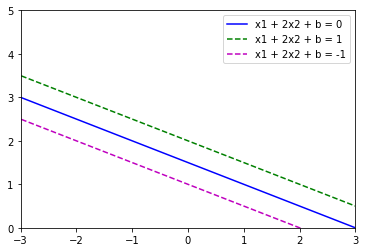

In [13]:
# Suppose w1 = 1, w2 = 2, and b = -3, draw the above
# three lines on a graph.
w1, w2, b = 1, 2, -3
x1_coordinates = np.array([-5, 5])
# w1 * x1 + w2 * x2 + b = 0
# w2 * x2 = -w1 * x1 - b
# x2 = (-w1 * x1 - b) / w2
x2_coordinates = (-w1 * x1_coordinates - b) / w2
plt.plot(x1_coordinates, x2_coordinates, 'b-', label="x1 + 2x2 + b = 0")

# w1 * x1 + w2 *x2 + b = 1
# w2 * x2 = (-w1 * x1 - b + 1)
# x2 = (-w1 * x1 - b + 1) / w2
x2_coordinates_1 = (-w1 * x1_coordinates - b + 1) / w2
plt.plot(x1_coordinates, x2_coordinates_1, 'g--', label="x1 + 2x2 + b = 1")

x2_coordinates_1 = (-w1 * x1_coordinates - b - 1) / w2
plt.plot(x1_coordinates, x2_coordinates_1, 'm--', label="x1 + 2x2 + b = -1")
plt.xlim([-3, 3])
plt.ylim([0, 5])
plt.legend()

## Linear SVM: Decision function and predictions

The linear SVM classifier model predicts the class of a new instance $(x_1, x_2)$ by simply computing the decision function $w_1x_1 + w_2x_2 + b$: if the result is positive, the predicted class is the class on the right, otherwise it is the class on the left.

**Decision rule**
\begin{equation}
\hat{y}(prediction)  = 
\left\{
\begin{array}{cc}
 1 & \textit{if } w_1x_1 + w_2x_2 + b \ge 0,\\
 -1 & \textit{if } w_1x_1 + w_2x_2 + b < 0.
\end{array}
\right.
\end{equation}

In [ ]:
# Suppose w1 = 1, w2 = 2, and b = -3, decide the 
# class of: 
# 1) x_1 = 0, x_2 = 1; 
# 2) x_1 = 2, x_2 = 3;
# 3) x_1 = 1, x_2 = 1.1.



In [ ]:
# Plot the points together with three decision lines.



## Linear SVM: Training objective
Let's explore how does the magnitude of parameters affect the margin.

(0, 5)

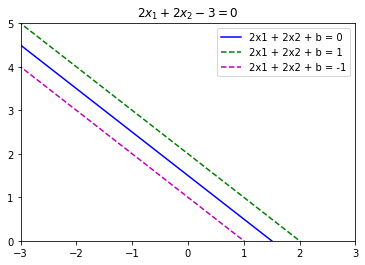

In [12]:
# In the previous model, increase w1 from 1 to 2,
# and plot the new decision margin.
# lines are: 2 * x1 + 2 * x2 - 3 = (0, 1, -1)

w1, w2, b = 2, 2, -3
x1_coordinates = np.array([-5, 5])
# w1 * x1 + w2 * x2 + b = 0
# w2 * x2 = -w1 * x1 - b
# x2 = (-w1 * x1 - b) / w2
x2_coordinates = (-w1 * x1_coordinates - b) / w2
plt.plot(x1_coordinates, x2_coordinates, 'b-', label="2x1 + 2x2 + b = 0")

# w1 * x1 + w2 *x2 + b = 1
# w2 * x2 = (-w1 * x1 - b + 1)
# x2 = (-w1 * x1 - b + 1) / w2
x2_coordinates_1 = (-w1 * x1_coordinates - b + 1) / w2
plt.plot(x1_coordinates, x2_coordinates_1, 'g--', label="2x1 + 2x2 + b = 1")

x2_coordinates_1 = (-w1 * x1_coordinates - b - 1) / w2
plt.plot(x1_coordinates, x2_coordinates_1, 'm--', label="2x1 + 2x2 + b = -1")
plt.legend()

plt.title(r"$2x_1 + 2x_2 - 3 = 0$")
plt.xlim([-3, 3])
plt.ylim([0, 5])



(0, 5)

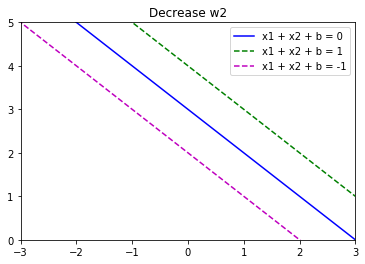

In [14]:
# Decrease w2 from 2 to 1 from the original model,
# and plot the new decision margin.

w1, w2, b = 1, 1, -3
x1_coordinates = np.array([-5, 5])
# w1 * x1 + w2 * x2 + b = 0
# w2 * x2 = -w1 * x1 - b
# x2 = (-w1 * x1 - b) / w2
x2_coordinates = (-w1 * x1_coordinates - b) / w2
plt.plot(x1_coordinates, x2_coordinates, 'b-', label="x1 + x2 + b = 0")

# w1 * x1 + w2 *x2 + b = 1
# w2 * x2 = (-w1 * x1 - b + 1)
# x2 = (-w1 * x1 - b + 1) / w2
x2_coordinates_1 = (-w1 * x1_coordinates - b + 1) / w2
plt.plot(x1_coordinates, x2_coordinates_1, 'g--', label="x1 + x2 + b = 1")

x2_coordinates_1 = (-w1 * x1_coordinates - b - 1) / w2
plt.plot(x1_coordinates, x2_coordinates_1, 'm--', label="x1 + x2 + b = -1")
plt.legend()

plt.title(r"Decrease w2")
plt.xlim([-3, 3])
plt.ylim([0, 5])



(0, 5)

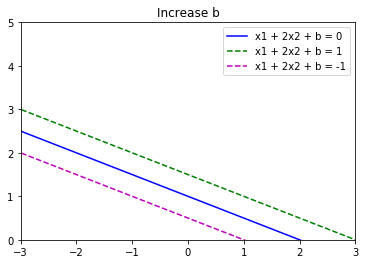

In [15]:
# Change b from -3 to -2 from the original model,
# and plot the new decision margin

w1, w2, b = 1, 2, -2
x1_coordinates = np.array([-5, 5])
# w1 * x1 + w2 * x2 + b = 0
# w2 * x2 = -w1 * x1 - b
# x2 = (-w1 * x1 - b) / w2
x2_coordinates = (-w1 * x1_coordinates - b) / w2
plt.plot(x1_coordinates, x2_coordinates, 'b-', label="x1 + 2x2 + b = 0")

# w1 * x1 + w2 *x2 + b = 1
# w2 * x2 = (-w1 * x1 - b + 1)
# x2 = (-w1 * x1 - b + 1) / w2
x2_coordinates_1 = (-w1 * x1_coordinates - b + 1) / w2
plt.plot(x1_coordinates, x2_coordinates_1, 'g--', label="x1 + 2x2 + b = 1")

x2_coordinates_1 = (-w1 * x1_coordinates - b - 1) / w2
plt.plot(x1_coordinates, x2_coordinates_1, 'm--', label="x1 + 2x2 + b = -1")
plt.legend()

plt.title(r"Increase b")
plt.xlim([-3, 3])
plt.ylim([0, 5])



**How does each parameter affect the width of decision margin?**
- smaller w_1 -> wider gap; larger w_1 -> narrower gap.
- smaller w_2 -> wider gap; larger w_2 -> narrower gap.
- b does not affect the width of the gap.

- Cost function should give a large value if the gap is narrow, and gives a small value if the gap is wide.
- Cost function = ?

## Drawbacks of Hard Margin SVM
If we strictly impose that all instances be off the street and on the correct side, the model can only be applied to models that are linearly separable. Moreover, it will be very sensitive to outliers. The above figure illustrates how badly one outlier may affect the model. 

<img src="https://github.com/ch00226855/CMP464-788-Spring2019/raw/master/Data/SVM3.png">

To avoid these issues, it is preferable to use a more flexible model. The objective is to find a good balance between keeping the street as wide as possible and limiting the margin violations. This is called *soft margin classification*.

## Task 2: Linear SVM with Soft Margin
- Each data example has two features: $x_1$ and $x_2$.
- Binary classification: target value $y = 1$ means that the instance belongs to "class 1", $y = -1$ means that the instance belongs to "class -1".
- Classes are **mostly** linearly separable: **with a few exceptions**, the two classes can be separrated with a straight line.
- The goal is to find a straight line that best separates the two classes. **Mis-classifications are allowed, but each mis-classification will add a cost to the model.**
- The objective function takes into account both **the magnitude of w's (how wide the gap is) and the degree of margin violations**.

<img src="https://github.com/ch00226855/CMP464-788-Spring2019/raw/master/Data/SVM4.jpg" width="600">

### Advantages of Soft Margin SVM
- The dataset does not have to be linearly separable.
- Outliers does not affect the model too much.
- The cost function is convex and it has no constraints, thus gradient descent can be applied to its minimization.

## Improving Linear SVM
- Feature scaling: are all features distributed similarly?
- $C$: how much does penalty matter?
- Class weights: are all classes equally important?
- Multiple classes: One vs. One, or One vs. Rest?
- **Kernel SVM**: Allow non-linear decision boundaries

## Kernel (Non-Linear) SVM: Motivation
- Data may not be linearly separable in their original features.

Consider the following dataset:

In [ ]:
m = 100  # size of data set
data = pd.DataFrame(index=np.arange(m))
# input features: x1, x2
data['x1'] = np.random.randn(m)
data['x2'] = np.random.randn(m)
# target value: y
# y = 0 if (x1, x2) is inside the unit circle
# y = 1 if (x1, x2) is outside of the unit circle
data['y'] = (data['x1'] ** 2 + data['x2'] ** 2 < 1)

# plot the data
plt.figure(figsize=(8, 8))
plt.scatter(data['x1'],
            data['x2'],
            c=data['y'])
plt.xlabel(r'$x_1$')
plt.ylabel(r'$x_2$')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.grid(True, which='both')
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.show()

## SVM with Polynomial Kernel
This dataset is clearly not linear separable. Next, add two new features $x_1^2$ and $x_2^2$.

In [ ]:
# add two new features: x1 squared and x2 squared
data['x1^2'] = data['x1'] ** 2
data['x2^2'] = data['x2'] ** 2

In [ ]:
plt.figure(figsize=(8, 8))
plt.scatter(data['x1^2'],
            data['x2^2'],
            c=data['y'])
plt.grid(True, which='both')
plt.xlabel('x1 squared')
plt.ylabel('x2 squared')
plt.xlim(0, 4)
plt.ylim(0, 4)
plt.show()

In [ ]:
from sklearn.svm import SVC
model = SVC(C=10,
            kernel='poly',
            degree=2,
            coef0=0)
# The hyperparameter coef0 controls how much the
# model is influenced by high-degree polynomials
# versus low-degree polynomials
model.fit(data[['x1', 'x2']], data['y'])

## <a href="https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html">sklearn.svm.SVC</a>

- Parameters
- Attributes
- Methods

In [ ]:
# plot the decision boundary
x1s = np.linspace(-2, 2, 100)
x2s = np.linspace(-2, 2, 100)
x1, x2 = np.meshgrid(x1s, x2s)
X = np.c_[x1.reshape(-1, 1), x2.reshape(-1, 1)]
y_pred = model.predict(X).reshape(x1.shape)
plt.contourf(x1, x2, y_pred,
             cmap=plt.cm.brg,
             alpha=0.2)
y_decision = model.decision_function(X).reshape(x1.shape)
plt.contourf(x1, x2, y_decision,
             cmap=plt.cm.brg,
             alpha=0.1)
plt.scatter(data['x1'], data['x2'], c=data['y'])
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.xlim(-2, 2)
plt.ylim(-2, 2)
plt.show()

## Choice of kernels
Consider a dataset with $m$ examples, each having $n$ features.
1. If $m < n$, then it is advised to use no kernel (sometimes called *linear kernel*) to avoid overfitting.
2. If $m$ is slightly larger than $n$, use a kernel (Gaussian RBF kernel is generally better than polynomial kernel in practice)
3. If $m$ is extremely large, it is usually a good idea to create new features.

Other choices of kernels: 
- sigmoid kernel (equivalent to logistic regression)
- string kernel (for text data)
- define new kernels

## The Kernel Trick

Adding extra features may dramatically increase the computational complexity. For example, consider a polynomial kernel with degree 3 and set coef0 = 1. This means to transform each input feature x as:

$(x+1)^3 = x^3 + 3x^2 + 3x + 1$,

and two new features 'x^3', 'x^2' are added to the model. If the dataset is very complex and a large degree is needed, the model will create a huge number of features, making the model too slow.

Fortunately, when using SVMs you can apply an almost miraculous mathematical technique called the *kernel trick*, which makes it possible to handle extra features without actually having to add them. As a result, the exponential explosion of complexity is avoided since new features are not actually added.